In [187]:
#Importing library pandas for datafram
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
#Reading csv file in dataframe
maindf = pd.read_csv('customer_activity_enhanced.csv')

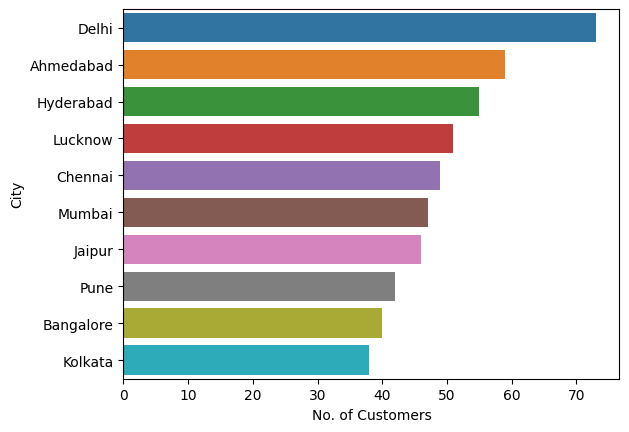

In [207]:
#Grouping by City to find out where customer lie
df1 = maindf.loc[:,["CustomerID","City"]]
df1 = df1.groupby(['City']).agg('count').reset_index()

#Ordering
df1 = df1.sort_values(by=['CustomerID'],ascending=False)

#Ploting the graph
sns.barplot(data=df1,x='CustomerID',y='City',orient = 'h')

plt.xlabel('No. of Customers')
plt.show()

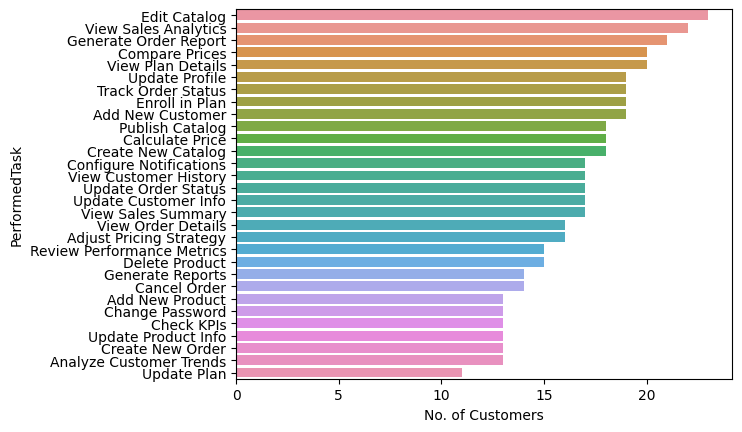

In [213]:
df2 = maindf.loc[:,["CustomerID","PerformedTask"]]
df2 = df2.groupby(['PerformedTask']).size().reset_index()

#Ordering
df2 = df2.sort_values(by=[0],ascending=False)

#Ploting the graph
sns.barplot(data=df2,x=0,y='PerformedTask',orient = 'h')

plt.xlabel('No. of Customers')
plt.show()


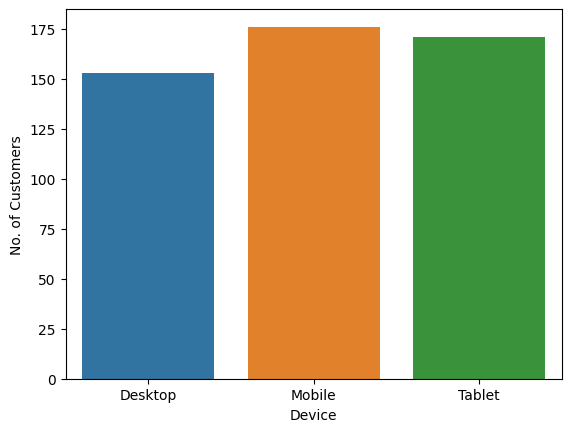

In [224]:
df3 = maindf.loc[:,['CustomerID','Device']]
df3 = df3.groupby(['Device']).agg('count').reset_index()

#Ploting the graph
sns.barplot(data=df3,x='Device',y='CustomerID')

plt.ylabel('No. of Customers')
plt.show()

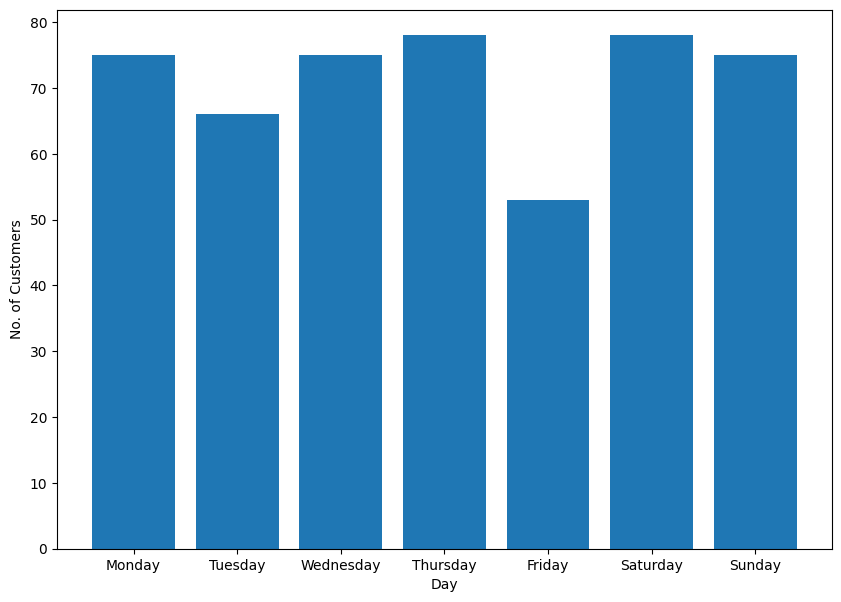

In [225]:
df4 = maindf.loc[:,["CustomerID","DateTime"]]

#Extracting Date and time from DateTime column
df4['Dates'] = pd.to_datetime(df4['DateTime']).dt.date
df4['Time'] = pd.to_datetime(df4['DateTime']).dt.time

#Formating and Date to day 
df4['Dates'] = pd.to_datetime(df4['Dates'])
df4['Day'] = df4['Dates'].dt.day_name()

#Ordering weekdays
order = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

#grouping by days
df4 = df4.groupby(['Day']).agg('count').reindex(order).reset_index()

#Ploting the graph
name = df4['Day']
no = df4['CustomerID']

fig = plt.figure(figsize=(10,7))

plt.bar(name,no)
plt.xlabel('Day')
plt.ylabel('No. of Customers')
plt.show()

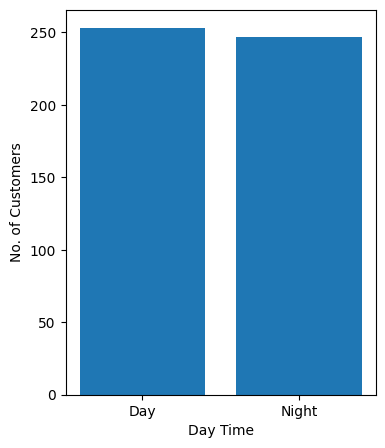

In [143]:
df5 = maindf.loc[:,["CustomerID","DateTime"]]

#formating date and time
df5['DateTime'] = pd.to_datetime(df5['DateTime'])

#Time to day or night
df5['Is_Day'] = df5['DateTime'].dt.hour.between(7, 18)
df5['Is_Day'] = df5['Is_Day'].replace({True: "Day", False: "Night"})

#group by Day or Night
df5 = df5.groupby(['Is_Day']).agg('count').reset_index()

#Ploting the graph
name = df5['Is_Day']
no = df5['CustomerID']

fig = plt.figure(figsize=(4,5))

plt.bar(name,no)
plt.xlabel('Day Time')
plt.ylabel('No. of Customers')
plt.show()